<a href="https://colab.research.google.com/github/Vram97/Car-and-Truck-classification/blob/main/Copy_of_RetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras_retinanet

     |████████████████████████████████| 71 kB 3.2 MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=163922 sha256=eb02cfef1ff167e8f206e6b1b47a876ef7f527911b86c6e8a97ccee9a5731543
  Stored in directory: /root/.cache/pip/wheels/55/a1/41/f2dbc08b26549fe00041b9bc25c299f262b0311ad68cc52522
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=1eaa3e01b20d8c4a11dd0d41bd9dcc9cb6416eef2e1230d39e4fad62559c792b
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-retinanet keras-resnet


In [ ]:
# show images inline
%matplotlib inline


# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
# gpu = 0

# set the modified tf session as backend in keras
# setup_gpu(gpu)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
# model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')
model_path = "/content/drive/MyDrive/resnet50_coco_best_v2.1.0.h5"
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())
# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}


processing time:  2.5023984909057617


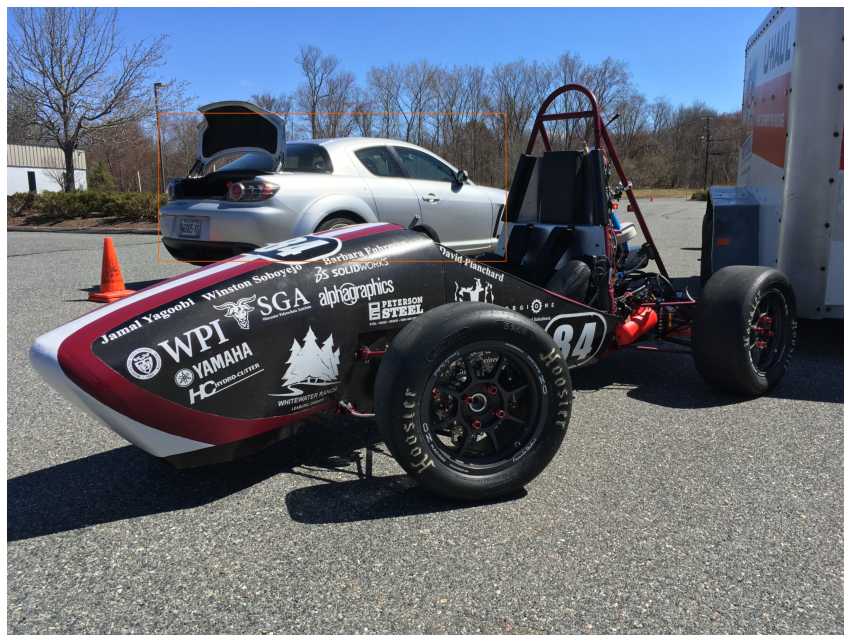

In [ ]:
# load image
image = read_image_bgr('/content/drive/MyDrive/images/car5.jpeg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [ ]:
!pip install imageai

     |████████████████████████████████| 160 kB 4.2 MB/s 
     |████████████████████████████████| 2.9 MB 51.1 MB/s 
     |████████████████████████████████| 2.1 MB 34.8 MB/s 
     |████████████████████████████████| 11.6 MB 15.2 MB/s 
     |████████████████████████████████| 14.9 MB 101 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.

In [ ]:
from imageai.Detection import VideoObjectDetection

def forFrame(frame_number, output_array, output_count):
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)
  print("Output count for unique objects : ", output_count)
  print("------------END OF A FRAME --------------")



# execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath("/content/drive/MyDrive/resnet50_coco_best_v2.1.0.h5")
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path = "/content/drive/MyDrive/images/traffic_custom_detected.avi",
                                output_file_path = "/content/drive/MyDrive/images", 
                                frames_per_second=20, per_frame_function=forFrame,  minimum_percentage_probability=30)

print(video_path)

Streaming output truncated to the last 5000 lines.
Output for each object :  [{'name': 'car', 'percentage_probability': 88.82336020469666, 'box_points': [627, 167, 676, 199]}]
Output count for unique objects :  {'car': 1}
------------END OF A FRAME --------------
FOR FRAME  1047
Output for each object :  [{'name': 'car', 'percentage_probability': 90.71824550628662, 'box_points': [628, 166, 677, 198]}]
Output count for unique objects :  {'car': 1}
------------END OF A FRAME --------------
FOR FRAME  1048
Output for each object :  [{'name': 'car', 'percentage_probability': 87.95098066329956, 'box_points': [629, 167, 678, 199]}]
Output count for unique objects :  {'car': 1}
------------END OF A FRAME --------------
FOR FRAME  1049
Output for each object :  [{'name': 'car', 'percentage_probability': 91.32641553878784, 'box_points': [630, 167, 679, 199]}]
Output count for unique objects :  {'car': 1}
------------END OF A FRAME --------------
FOR FRAME  1050
Output for each object :  [{'name